In [2]:
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Normalization
from tensorflow.keras.preprocessing import image, image_dataset_from_directory

In [3]:
train_ds= image_dataset_from_directory('dataset/Training', subset='training', seed = 12,
                                       validation_split = 0.1, batch_size=32,
                                       image_size = (128,128))

Found 10 files belonging to 2 classes.


Using 9 files for training.


In [4]:
val_ds= image_dataset_from_directory('dataset/Training', subset='validation', seed = 12,
                                       validation_split = 0.1, batch_size=32,
                                       image_size = (128,128))

Found 10 files belonging to 2 classes.
Using 1 files for validation.


In [5]:
test_ds= image_dataset_from_directory('dataset/Testing', seed = 12,
                                       batch_size=32,
                                       image_size = (128,128))

Found 4 files belonging to 2 classes.


In [6]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
test_ds = train_ds.prefetch(buffer_size=AUTOTUNE)

In [7]:
vgg16_net= VGG16(weights='imagenet', include_top=False, input_shape=(128,128,3))

In [8]:
model = Sequential()
model.add(Normalization(input_shape=(128,128,3)))
model.add(vgg16_net)
model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))
model.add(Dropout(0.2))

c:\Python311\Lib\site-packages\keras\src\layers\preprocessing\normalization.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 128, 128, 3)    │             7 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     4,194,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │         1,026 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 2)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,173,193 (73.14 MB)

 Trainable params: 19,173,186 (73.14 MB)

 Non-trainable params: 7 (32.00 B)

In [21]:
history = model.fit(train_ds, validation_data=val_ds, epochs=20) 

Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5556 - loss: 5.6037 - val_accuracy: 0.5556 - val_loss: 2049953280.0000
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5556 - loss: 5.4497 - val_accuracy: 0.5556 - val_loss: 2312888064.0000
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5556 - loss: 7.2406 - val_accuracy: 0.5556 - val_loss: 2579193088.0000
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5556 - loss: 7.1636 - val_accuracy: 0.5556 - val_loss: 2846307328.0000
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5556 - loss: 3.7358 - val_accuracy: 0.5556 - val_loss: 3111869184.0000
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5556 - loss: 5.5267 - val_accuracy: 0.5556 - val_loss: 3373729536.0000
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5556 - loss: 7.1636 - val_accuracy: 0.5556 - val_loss: 3629986816.0000
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5556 - loss: 5.

In [22]:
model.evaluate(test_ds)[1]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step - accuracy: 0.5556 - loss: 6075580416.0000


0.5555555820465088

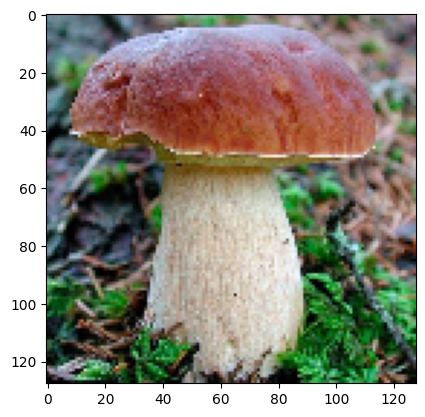

In [23]:
im1 = image.load_img('1644235148_16-pro-dachnikov-com-p-letnii-belii-grib-foto-20.jpg', target_size=(128,128))
plt.imshow(im1)

In [24]:
im1 = image.img_to_array(im1)
im1 = np.expand_dims(im1, axis = 0)
pr = model.predict(im1)
pr

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


array([[1., 0.]], dtype=float32)